In [1]:
import pygam as pg

In [5]:
pg.__str__()

"<module 'pygam' from 'c:\\\\python\\\\lib\\\\site-packages\\\\pygam\\\\__init__.py'>"

In [6]:
from pygam.datasets import wage

In [7]:
X, y = wage()

In [17]:
from pygam import LinearGAM, s, f
gam = LinearGAM(s(0, n_splines=5) + s(1) + f(2)).fit(X,y)


In [25]:
gam.terms

s(0) + s(1) + f(2) + intercept

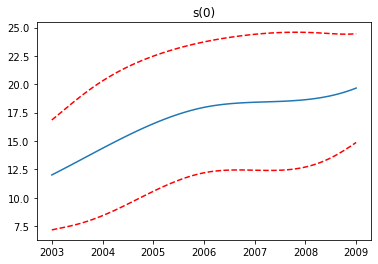

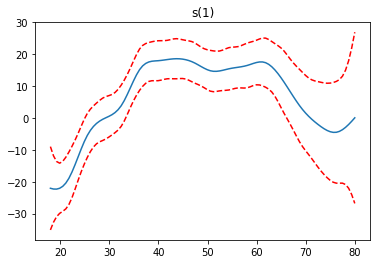

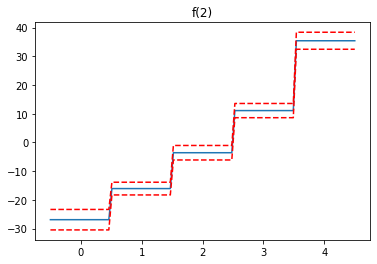

In [28]:
import matplotlib.pyplot as plt
for i, term in enumerate(gam.terms):
    if term.isintercept: continue
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    
    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(repr(term))
    plt.show()